In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
file_path = 'data_daily.csv'
data = pd.read_csv(file_path)


# Display the first few rows of the dataset to understand its structure
data.head()


,# Date,Receipt_Count
0,2021-01-01,7564766
1,2021-01-02,7455524
2,2021-01-03,7095414
3,2021-01-04,7666163
4,2021-01-05,7771289


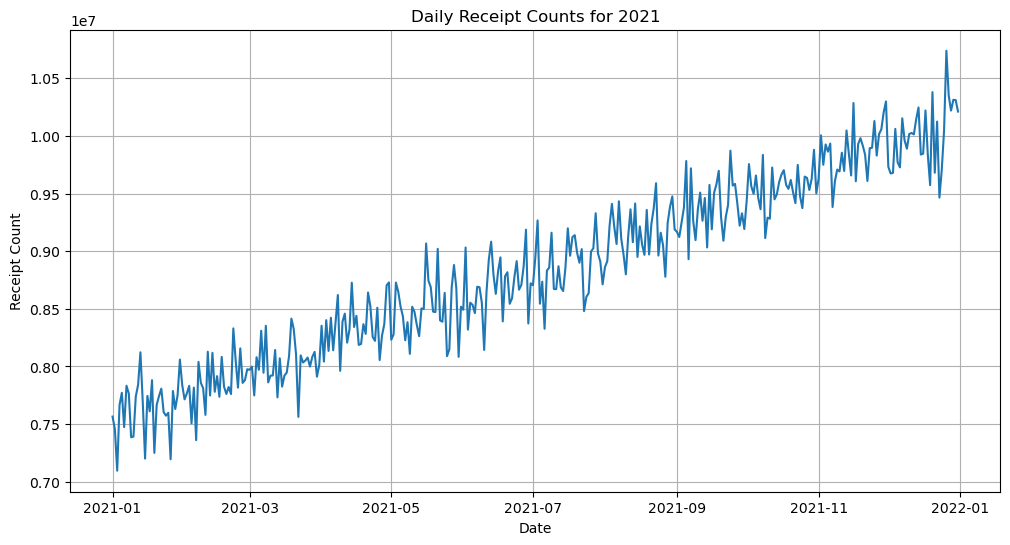

(            Receipt_Count
 Date                     
 2021-01-31      236736687
 2021-02-28      220033460
 2021-03-31      248608625
 2021-04-30      250644830
 2021-05-31      263151748,
 # Date           0
 Receipt_Count    0
 dtype: int64)

In [3]:
# Convert 'Date' to datetime format
data['Date'] = pd.to_datetime(data['# Date'])

# Set 'Date' as the index
data.set_index('Date', inplace=True)

# Plot the daily receipt count
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Receipt_Count'])
plt.title('Daily Receipt Counts for 2021')
plt.xlabel('Date')
plt.ylabel('Receipt Count')
plt.grid(True)
plt.show()

# Check for missing data
missing_data = data.isnull().sum()

# Aggregate data by month
monthly_data = data.resample('M').sum()

# Display the first few rows of the monthly data and the missing data information
monthly_data.head(), missing_data


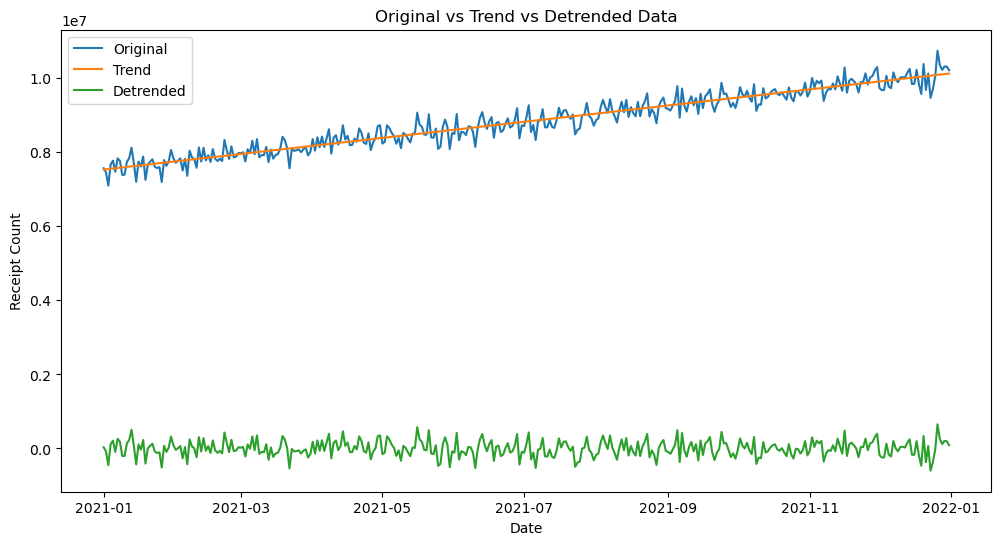

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame with 'Receipt_Count' and 'Date'
data['TimeIndex'] = range(len(data))
data['Date'] = pd.to_datetime(data['# Date'])

# Fit a linear trend model
trend_model = np.polyfit(data['TimeIndex'], data['Receipt_Count'], 1)

# Predict the trend
trend = np.polyval(trend_model, data['TimeIndex'])

# Detrend the data by subtracting the trend component
detrended = data['Receipt_Count'] - trend

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Receipt_Count'], label='Original')
plt.plot(data['Date'], trend, label='Trend')
plt.plot(data['Date'], detrended, label='Detrended')
plt.legend()
plt.title('Original vs Trend vs Detrended Data')
plt.xlabel('Date')
plt.ylabel('Receipt Count')
plt.show()


In [5]:
type(detrended)

pandas.core.series.Series

In [6]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

def adf_test(series, title=''):
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(), autolag='AIC')  # dropna() because differencing may produce NA values
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    for key, value in result[4].items():
        print(f'Critial Value {key} : {value}')


# Apply ADF test on the original series
adf_test(detrended, title='Original Data')

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


Augmented Dickey-Fuller Test: Original Data
ADF Statistic: -12.611631118447574
p-value: 1.6504393371188398e-23
Critial Value 1% : -3.448544133483233
Critial Value 5% : -2.8695574079525565
Critial Value 10% : -2.5710411593052713


In [7]:
import numpy as np
import pandas as pd

def AR(p, df):
    df_temp = df.copy()

    # Generating the lagged p terms
    for i in range(1, p+1):
        df_temp[f'Shifted_values_{i}'] = df_temp['Receipt_Count'].shift(i)

    train_size = int(0.8 * df_temp.shape[0])

    # Breaking data set into test and training
    df_train = df_temp[:train_size].dropna()
    df_test = df_temp[train_size:]

    # X contains the lagged values, hence we skip the first column
    X_train = df_train.iloc[:, 1:].values
    # Y contains the value, it is the first column
    y_train = df_train.iloc[:, 0].values

    # Running linear regression to generate the coefficients of lagged terms
    # Adding a column of ones to include the intercept in the model
    X_train = np.hstack([np.ones((X_train.shape[0], 1)), X_train])
    
    # Compute the least-squares solution
    theta, residuals, rank, s = np.linalg.lstsq(X_train, y_train, rcond=None)
    intercept, coeffs = theta[0], theta[1:]

    df_train['Predicted_Values'] = X_train.dot(theta)
    
    # Preparing test data for prediction
    X_test = df_test.iloc[:, 1:].values
    X_test = np.hstack([np.ones((X_test.shape[0], 1)), X_test])
    df_test['Predicted_Values'] = X_test.dot(theta)
    
    # Calculating RMSE
    RMSE = np.sqrt(np.mean((df_test['Receipt_Count'] - df_test['Predicted_Values'])**2))

    print(f"The RMSE is: {RMSE}, Value of p: {p}")
    return df_train, df_test, coeffs, intercept, RMSE


In [8]:

best_RMSE=100000000000
best_p = -1

for i in range(1,21):
  [df_train,df_test,theta,intercept,RMSE] = AR(i,pd.DataFrame(detrended))
  if RMSE < best_RMSE:
    best_p = i
    best_RMSE = RMSE

The RMSE is: 220257.6725983879, Value of p: 1
The RMSE is: 220529.1247246006, Value of p: 2
The RMSE is: 225278.06314398025, Value of p: 3
The RMSE is: 225619.3097467466, Value of p: 4
The RMSE is: 225148.2846150794, Value of p: 5
The RMSE is: 225409.13390478634, Value of p: 6
The RMSE is: 225527.7455074113, Value of p: 7
The RMSE is: 225127.62281689292, Value of p: 8
The RMSE is: 224830.22371168315, Value of p: 9
The RMSE is: 224626.69877695822, Value of p: 10
The RMSE is: 230274.3835723117, Value of p: 11
The RMSE is: 230076.01650363943, Value of p: 12
The RMSE is: 230362.905824885, Value of p: 13
The RMSE is: 231119.61444278853, Value of p: 14
The RMSE is: 230951.94827925964, Value of p: 15
The RMSE is: 230374.15041613122, Value of p: 16
The RMSE is: 228532.68493746276, Value of p: 17
The RMSE is: 227865.66568263806, Value of p: 18
The RMSE is: 229212.51754225732, Value of p: 19
The RMSE is: 228451.00558326734, Value of p: 20


/var/folders/qg/d5tdmdz52cd8hpt3ktrl_hp80000gn/T/ipykernel_3863/2616851933.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['Predicted_Values'] = X_test.dot(theta)
/var/folders/qg/d5tdmdz52cd8hpt3ktrl_hp80000gn/T/ipykernel_3863/2616851933.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['Predicted_Values'] = X_test.dot(theta)
/var/folders/qg/d5tdmdz52cd8hpt3ktrl_hp80000gn/T/ipykernel_3863/2616851933.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

In [9]:
[df_train,df_test,ar_theta,ar_intercept,RMSE] = AR(best_p,pd.DataFrame(detrended))
print(ar_theta)
print(ar_intercept)
print(best_p)

The RMSE is: 220257.6725983879, Value of p: 1
[0.02446118]
-2715.201981902177
1


/var/folders/qg/d5tdmdz52cd8hpt3ktrl_hp80000gn/T/ipykernel_3863/2616851933.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['Predicted_Values'] = X_test.dot(theta)


<AxesSubplot:xlabel='Date'>

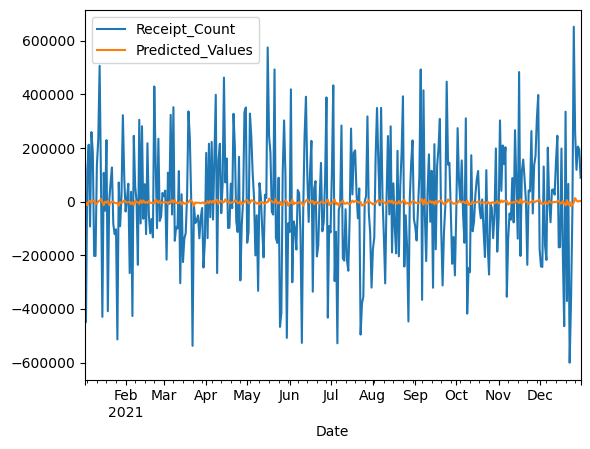

In [10]:

df_c = pd.concat([df_train,df_test])
df_c[['Receipt_Count','Predicted_Values']].plot()

<AxesSubplot:ylabel='Density'>

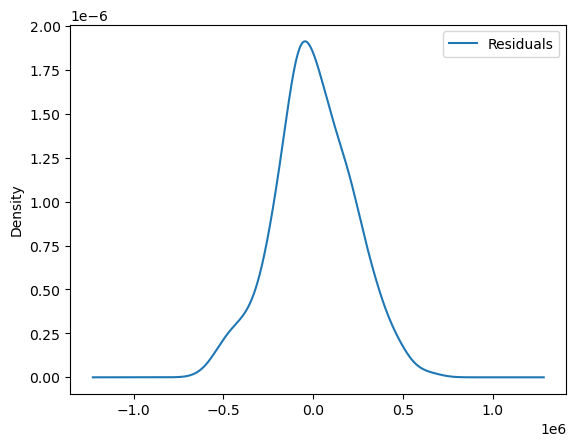

In [11]:

res = pd.DataFrame()
res['Residuals'] = df_c.Receipt_Count - df_c.Predicted_Values

res.plot(kind='kde')

In [12]:
import numpy as np
import pandas as pd

def MA(q, res):
    for i in range(1, q+1):
        res['Shifted_values_%d' % i] = res['Residuals'].shift(i)

    train_size = int(0.8 * res.shape[0])

    res_train = res[:train_size].dropna()
    res_test = res[train_size:]

    # Prepare training data
    X_train = res_train.iloc[:, 1:].values
    y_train = res_train.iloc[:, 0].values

    # Add a column of ones to include intercept in the model
    X_train = np.hstack([np.ones((X_train.shape[0], 1)), X_train])

    # Linear regression using numpy's lstsq
    theta = np.linalg.lstsq(X_train, y_train, rcond=None)[0]
    intercept, coefficients = theta[0], theta[1:]

    # Predictions for training set
    res_train['Predicted_Values'] = X_train.dot(theta)

    # Prepare test data
    X_test = res_test.iloc[:, 1:].values
    X_test = np.hstack([np.ones((X_test.shape[0], 1)), X_test])

    # Predictions for test set
    res_test['Predicted_Values'] = X_test.dot(theta)

    # Calculate RMSE
    RMSE = np.sqrt(np.mean((res_test['Residuals'] - res_test['Predicted_Values'])**2))

    print("The RMSE is:", RMSE, ", Value of q:", q)
    return res_train, res_test, coefficients, intercept, RMSE

# Example usage:
# Assume 'res' is your pandas DataFrame with a column 'Residuals'
# result = MA(q=2, res=res)


In [13]:

best_RMSE=100000000000
best_q = -1

for i in range(1,13):
  [res_train,res_test,theta,intercept,RMSE] = MA(i,pd.DataFrame(res.Residuals))
  if RMSE < best_RMSE:
    best_RMSE  = RMSE
    best_q = i

The RMSE is: 220234.10642536893 , Value of q: 1
The RMSE is: 220390.2339775226 , Value of q: 2
The RMSE is: 225201.2220783229 , Value of q: 3
The RMSE is: 225567.4708458438 , Value of q: 4
The RMSE is: 225351.50713650437 , Value of q: 5
The RMSE is: 225479.03271895426 , Value of q: 6
The RMSE is: 225820.11430387726 , Value of q: 7
The RMSE is: 224969.37437262828 , Value of q: 8
The RMSE is: 224694.7218098826 , Value of q: 9
The RMSE is: 225094.00637482907 , Value of q: 10
The RMSE is: 230123.46071338627 , Value of q: 11
The RMSE is: 229245.79173352185 , Value of q: 12


/var/folders/qg/d5tdmdz52cd8hpt3ktrl_hp80000gn/T/ipykernel_3863/449208320.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res_test['Predicted_Values'] = X_test.dot(theta)
/var/folders/qg/d5tdmdz52cd8hpt3ktrl_hp80000gn/T/ipykernel_3863/449208320.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res_test['Predicted_Values'] = X_test.dot(theta)
/var/folders/qg/d5tdmdz52cd8hpt3ktrl_hp80000gn/T/ipykernel_3863/449208320.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

In [14]:
[res_train,res_test,ma_theta,ma_intercept,RMSE] = MA(best_q,pd.DataFrame(res.Residuals))
print(ma_theta)
print(ma_intercept)
print(best_q)

The RMSE is: 220234.10642536893 , Value of q: 1
[0.00095993]
277.1408857068334
1


/var/folders/qg/d5tdmdz52cd8hpt3ktrl_hp80000gn/T/ipykernel_3863/449208320.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res_test['Predicted_Values'] = X_test.dot(theta)


In [15]:
res_c = pd.concat([res_train,res_test])
res_c

,Residuals,Shifted_values_1,Predicted_Values
Date,,,
2021-01-03,-444811.214380,-80427.499677,199.935881
2021-01-04,127800.597834,-444811.214380,-149.848043
2021-01-05,212019.501934,127800.597834,399.820887
2021-01-06,-95466.906672,212019.501934,480.665386
2021-01-07,264179.863452,-95466.906672,185.499059
...,...,...,...
2021-12-27,243235.207724,655588.924394,906.462278
2021-12-28,114828.420964,243235.207724,510.630369
2021-12-29,204978.027518,114828.420964,387.368467


<AxesSubplot:xlabel='Date'>

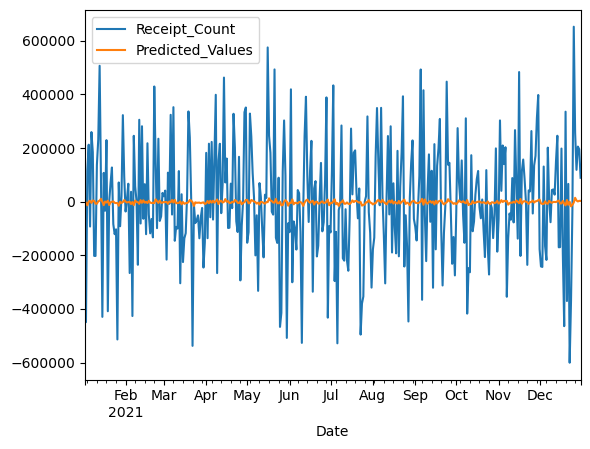

In [16]:
df_c.Predicted_Values += res_c.Predicted_Values
df_c[['Receipt_Count','Predicted_Values']].plot()


In [17]:
import numpy as np

def mean_absolute_error(y_true, y_pred):
    """
    Calculate the Mean Absolute Error (MAE).
    :param y_true: The actual values.
    :param y_pred: The predicted values.
    :return: MAE.
    """
    return np.mean(np.abs(y_true - y_pred))

def root_mean_squared_error(y_true, y_pred):
    """
    Calculate the Root Mean Squared Error (RMSE).
    :param y_true: The actual values.
    :param y_pred: The predicted values.
    :return: RMSE.
    """
    return np.sqrt(np.mean((y_true - y_pred)**2))


mae = mean_absolute_error(df_c['Receipt_Count'],df_c['Predicted_Values'])
rmse = root_mean_squared_error(df_c['Receipt_Count'],df_c['Predicted_Values'])
print('the mae of the fitted model is:', str(round(mae,2)))
print('the rmse of the fitted model is:', str(round(rmse,2)))

the mae of the fitted model is: 171389.07
the rmse of the fitted model is: 217348.68


In [18]:
import numpy as np
import pandas as pd

# Assuming 'data' is your DataFrame with 'Receipt_Count' and 'Date'
# Assuming 'ar_theta', 'ar_intercept', 'ma_theta', 'ma_intercept', 'best_p' are available from your AR and MA models

# Detrend the data (continued from previous code snippet)
# ... [Code for detrending]

# Apply AR model
def apply_ar_model(data, ar_theta, ar_intercept, p):
    ar_forecast = np.zeros(len(data) + 365)
    ar_forecast[:len(data)] = data.copy()
    for i in range(len(data), len(data) + 365):
        ar_forecast[i] = ar_intercept
        for j in range(1, p + 1):
            if i - j >= 0:
                ar_forecast[i] += ar_theta[j - 1] * ar_forecast[i - j]
    return ar_forecast[len(data):]

ar_forecast = apply_ar_model(detrended, ar_theta, ar_intercept, best_p)

# Apply MA model
def apply_ma_model(data, ma_theta, q):
    ma_forecast = np.zeros(len(data) + 365)
    ma_forecast[:len(data)] = data.copy()
    for i in range(len(data), len(data) + 365):
        for j in range(1, q + 1):
            if i - j >= 0:
                ma_forecast[i] += ma_theta[j - 1] * ma_forecast[i - j]
    return ma_forecast[len(data):]

ma_forecast = apply_ma_model(ar_forecast, ma_theta, len(ma_theta))

# Final forecast (combining AR and MA forecasts)
final_forecast = ar_forecast + ma_forecast

# Re-add the linear trend to the forecasts (continued from previous code snippet)
# ... [Code for re-adding trend]


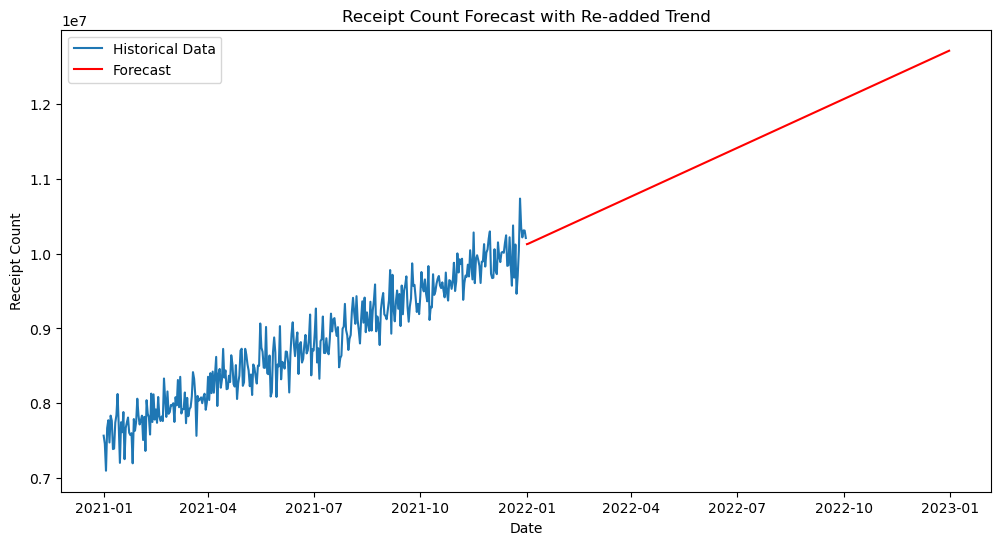

In [19]:
import numpy as np
import pandas as pd

# Assuming 'data' is your DataFrame and 'forecast' contains your 365-day predictions
# Extend the time index for the forecast period
forecast_index = range(len(data), len(data) + len(final_forecast))

# Calculate the trend values for the forecast period
forecast_trend = np.polyval(trend_model, forecast_index)

# Re-add the trend to the forecasted values
final_forecast = final_forecast + forecast_trend

# Creating a DataFrame for visualization
forecast_dates = pd.date_range(start=data.index[-1] + pd.Timedelta(days=1), periods=len(final_forecast), freq='D')
forecast_df = pd.DataFrame({'Date': forecast_dates, 'Forecast': final_forecast})

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Receipt_Count'], label='Historical Data')
plt.plot(forecast_df['Date'], forecast_df['Forecast'], label='Forecast', color='red')
plt.title('Receipt Count Forecast with Re-added Trend')
plt.xlabel('Date')
plt.ylabel('Receipt Count')
plt.legend()
plt.show()


In [22]:
import json

# Assuming parameters are in a dictionary format
model_params = {
    'ar_theta': ar_theta.tolist(),  # if they're numpy arrays
    'ar_intercept': ar_intercept.tolist(), 
    'best_p':best_p,
    'ma_theta': ma_theta.tolist(),
    'ma_intercept': ma_intercept.tolist(),
    'best_q' : best_q,
    'trend_model': trend_model.tolist()
}

# Save to JSON
with open('model_params.json', 'w') as f:
    json.dump(model_params, f)
